In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting the grid,size and color of the plots
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [6]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [7]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [8]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

### Checking Null Values

In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

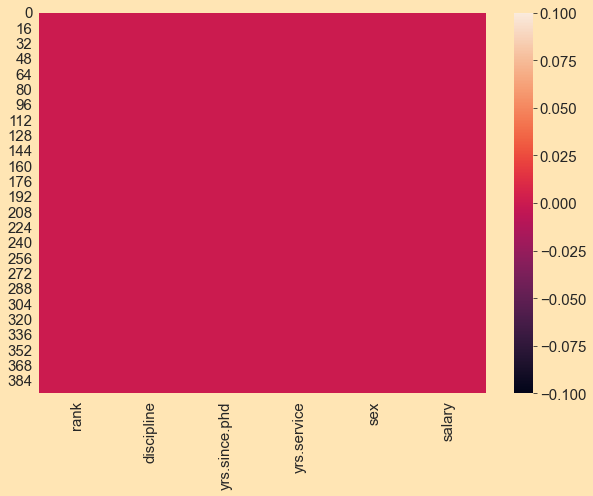

In [10]:
sns.heatmap(df.isnull()) # No null values

In [11]:
df.shape # We can see there are 397 rows and 6 columns

(397, 6)

In [12]:
# Let's see if there are any duplicated in the daframe
duplicates = df[df.duplicated()]

In [40]:
duplicates

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
151,AsstProf,B,4,4,Male,92000
163,AsstProf,B,3,3,Male,89942
197,AsstProf,B,4,4,Male,92000
200,AsstProf,B,4,4,Male,92700


In [14]:
# Removing Duplicates

df.drop_duplicates(inplace=True)

In [15]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [16]:
df.shape # we can see the dupliocate values are removed and the shape is reduced 

(393, 6)

### Univariate Analysis

<AxesSubplot:xlabel='rank', ylabel='count'>

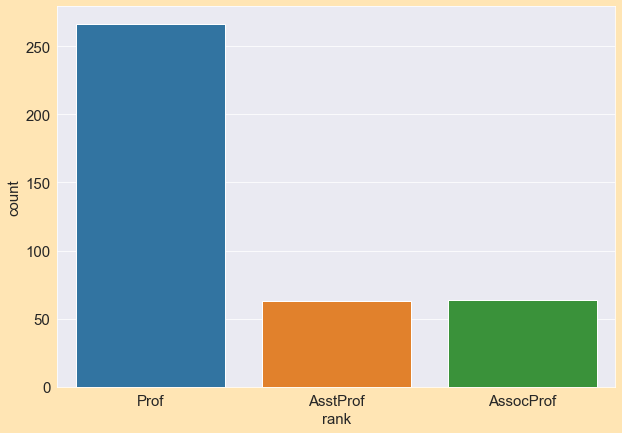

In [17]:
sns.countplot(df['rank'])  # professor ranked individuals are more in this dataset

<AxesSubplot:xlabel='sex', ylabel='count'>

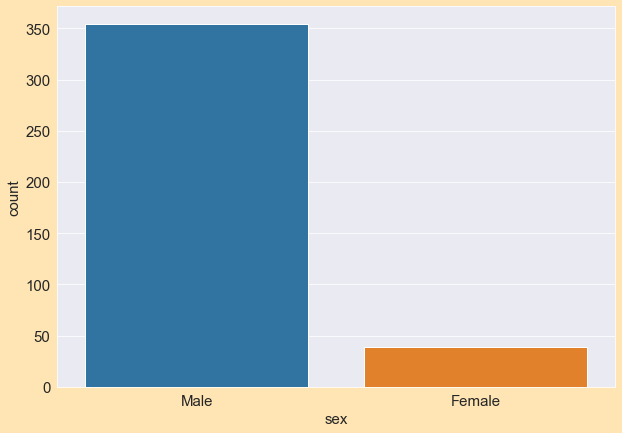

In [18]:
sns.countplot(df['sex']) # Most of the people are male

<AxesSubplot:xlabel='discipline', ylabel='count'>

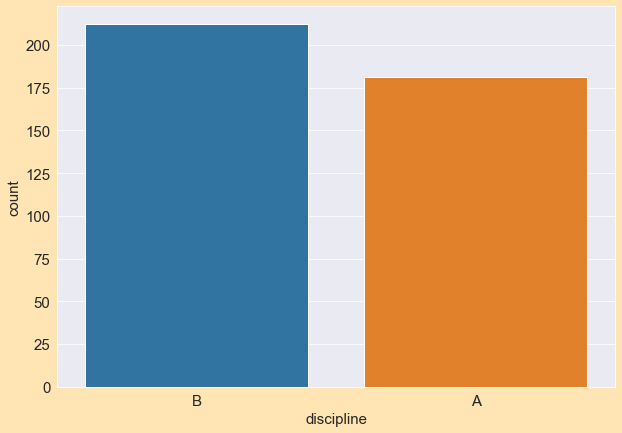

In [19]:
sns.countplot(df['discipline']) # most of the people belong to B discipline

<AxesSubplot:xlabel='yrs.service', ylabel='Count'>

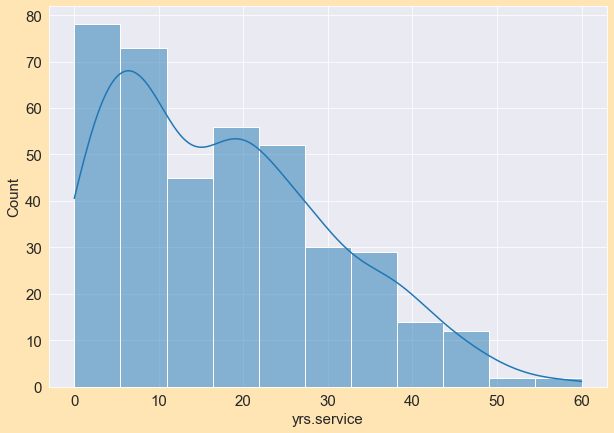

In [20]:
sns.histplot(df['yrs.service'],kde=True) # The highest years of service by a person in   60years

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Count'>

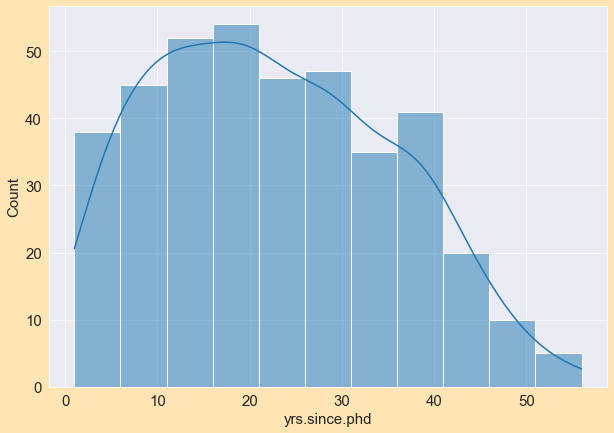

In [21]:
sns.histplot(df['yrs.since.phd'],kde=True)

### Bivariate Analysis

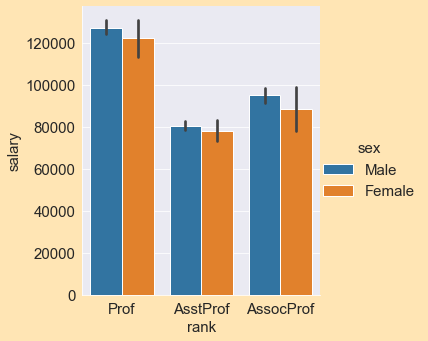

In [22]:
sns.catplot(x = 'rank',y = 'salary',hue = 'sex',data = df,kind = 'bar')
# Clearly proffesors have high salries than asst and asscoiate professors

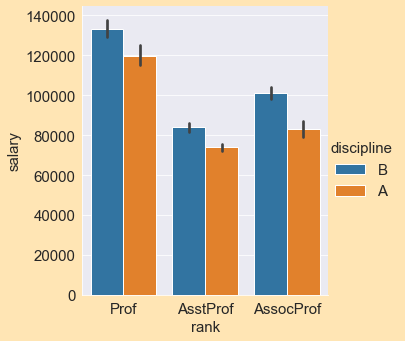

In [23]:
sns.catplot(x = 'rank',y = 'salary',hue = 'discipline',data = df,kind = 'bar')

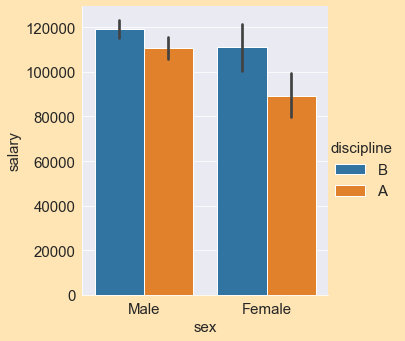

In [24]:
sns.catplot(x = 'sex',y = 'salary',hue = 'discipline',data = df,kind = 'bar')

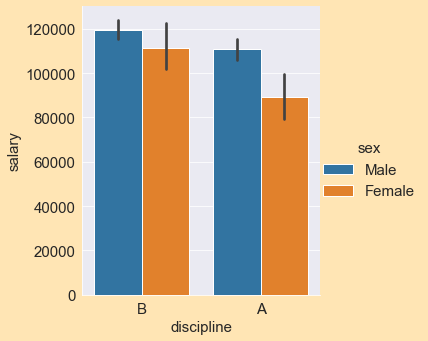

In [25]:
sns.catplot(x = 'discipline',y = 'salary',hue = 'sex',data = df,kind = 'bar')
# discipline B has more salries 
# the salaries of women in discipline B is almost same to the salries of men in discipline B

Text(0, 0.5, 'Years of service')

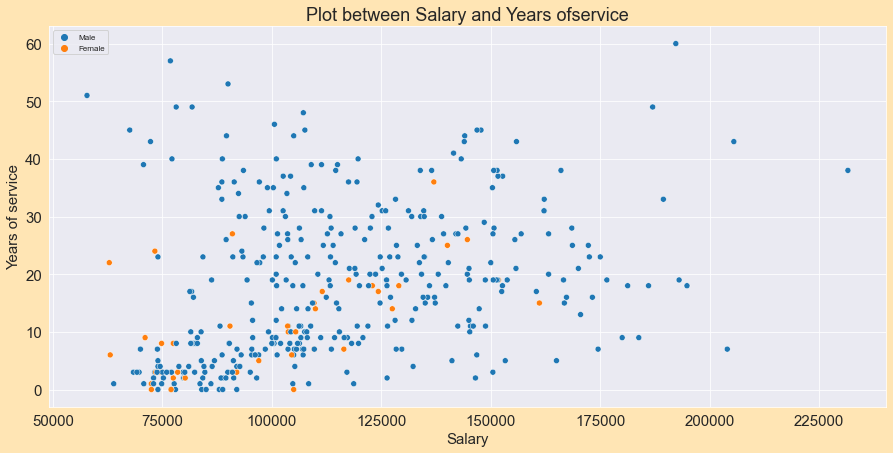

In [26]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Salary and Years ofservice')
sns.scatterplot(x = df['salary'],y = df['yrs.service'],hue = df['sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Salary')
plt.ylabel('Years of service')


In [27]:
# This graph make sense because the with the no.of years of service increase, will increase the salary and viceversa
# we can say salary and yeas of exp is positively correlated and we can there are outliers present as well
# The highest salary of women is significantly low when compared to men

Text(0, 0.5, 'Years of experience')

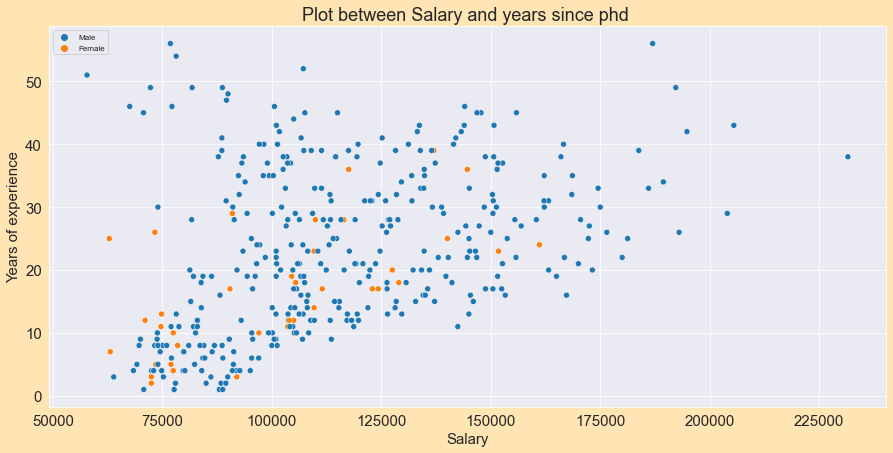

In [28]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Salary and years since phd ')
sns.scatterplot(x = df['salary'],y = df['yrs.since.phd'],hue = df['sex'])

plt.legend(loc = 'upper left',fontsize = 8)
plt.xlabel('Salary')
plt.ylabel('Years of experience')

### Description of the Data

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           393 non-null    object
 1   discipline     393 non-null    object
 2   yrs.since.phd  393 non-null    int64 
 3   yrs.service    393 non-null    int64 
 4   sex            393 non-null    object
 5   salary         393 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 29.6+ KB


In [30]:
df.describe(include=['O']) # categorical variables

,rank,discipline,sex
count,393,393,393
unique,3,2,2
top,Prof,B,Male
freq,266,212,354


In [31]:
df.describe() # ouliers might be present 

,yrs.since.phd,yrs.service,salary
count,393.000000,393.000000,393.000000
mean,22.503817,17.755725,113930.844784
std,12.814637,12.996129,30360.608788
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,17.000000,107500.000000
75%,32.000000,27.000000,134550.000000
max,56.000000,60.000000,231545.000000


### Encoding the categorical variables

In [32]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [33]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [34]:
# Using Onehot Encoding
from sklearn.preprocessing import OneHotEncoder

In [35]:
ohe = OneHotEncoder()

X_object = df.select_dtypes('object')
ohe.fit(X_object)

codes = ohe.transform(X_object).toarray()
feature_names = ohe.get_feature_names(['rank','discipline','sex'])

X = pd.concat([df.select_dtypes(exclude='object'),pd.DataFrame(codes,columns=feature_names).astype(int)], axis=1)

In [36]:
X

,yrs.since.phd,yrs.service,salary,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male
0,19.0,18.0,139750.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,20.0,16.0,173200.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,4.0,3.0,79750.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,45.0,39.0,115000.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,40.0,41.0,141500.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
392,33.0,30.0,103106.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
393,31.0,19.0,150564.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
394,42.0,25.0,101738.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395,25.0,15.0,95329.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
X.isnull().sum()

yrs.since.phd     4
yrs.service       4
salary            4
rank_AssocProf    4
rank_AsstProf     4
rank_Prof         4
discipline_A      4
discipline_B      4
sex_Female        4
sex_Male          4
dtype: int64

In [38]:
ccdef swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

SyntaxError: invalid syntax (Temp/ipykernel_32644/3178716733.py, line 1)

In [ ]:
df = swap_columns(df,'salary','sex_Male')

In [ ]:
df.head()

### Correlation 

In [ ]:
df.corr().transpose()

In [ ]:
plt.figure(figsize=(20,15),edgecolor='black')
sns.heatmap(df.corr().transpose(),annot=True,cmap='Blues')

In [ ]:
# We can see that rank_prof has good correlation with salary by 61%
# And yrs.since.phd and yrs.service are also moderately correlated with salary by 41 and 33 percent 
# rank_AsstProf is negatively moderately correlated with salry
# sex and discipline dummy columns are least correlated to salary

In [ ]:
df.corr()['salary'].sort_values()

In [ ]:
# removing least correlated values 
# we have four columns which are having same correlation 
# So we remove one column from from two similarly corrlated variables

In [ ]:
df.isnull()

### Checking Outliers

In [ ]:
# using boxplot

In [ ]:
df.boxplot('yrs.since.phd') # There are no outliers in this column

In [ ]:
df.boxplot('yrs.service') # there is only one outlier present in the yrs.service column

###  Checking Skewness

In [ ]:
sns.histplot(df['yrs.service'],kde=True) # this coulumn is skewed and bimodal

In [ ]:
sns.histplot(df['yrs.since.phd'],kde=True)

In [ ]:
df.dtypes

In [ ]:
df.select_dtypes('float').skew() # we should remove the skewness

### Cleaning the Data

In [ ]:
df.head(2)

In [ ]:
# DELETING THE LEAST CORRELATED VALUES WHICH ARE HAVING SAME CORRELATION IN THEIR DUMMY CATEGORY COLUMNS

sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()

In [ ]:
# Removing Skewnes 
# Before that plotting a Q-Q plot to check the distribution and the regression line
import scipy.stats as stats

In [ ]:
def dist_check(df,column):
    
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[column].hist()
    
    plt.subplot(1,2,2)
    stats.probplot(df[column],dist='norm',plot=plt) # probability plot
    plt.show()

In [ ]:
dist_check(df,'yrs.since.phd') # this is almost normally distributed

In [ ]:
dist_check(df,'yrs.service') # we can see there is skewness present in the yrs service and the regression line is not covering all the points

In [ ]:
df.sample(3)

In [ ]:
df['yrs.service'] = np.sqrt(df['yrs.service'])

In [ ]:
dist_check(df,'yrs.service') # we can see It is now normally distributes

In [ ]:
df['yrs.since.phd'] = np.sqrt(df['yrs.since.phd']) # we can see yrs.since.phd is transformed to almost normal distribution 

In [ ]:
dist_check(df,'yrs.since.phd') 

SPLITTING THE DATA

In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x.head()

### Scaling the data

Linear regression model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [1]:
lr = LinearRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training r2 score is ', round(r2_score(y_train,pred_train)*100,1))
        print('Testing r2 score is ', round(r2_score(y_test,pred_test)*100,1), '\n\n')

NameError: name 'LinearRegression' is not defined